<a href="https://colab.research.google.com/github/AsmaBenHmidene/Project-2/blob/main/Project_2_Part_4_(Core)_data_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First choice: dataset 1
## Metabolic Syndrome:

1. Source of data

The dataset for analysis came from the NHANES initiative.
https://data.world/informatics-edu/metabolic-syndrome-prediction

2. Brief description of data

To predict metabolic syndrome, yes or not based on common risk factors.The following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model

3. What is the target?

Metabolicsyndrome

4. What does one row represent? (A person? A business? An event? A product?)

a person

5. Is this a classification or regression problem?

classification problem

6. How many features does the data have?

14 features

7. How many rows are in the dataset?

2401 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Some features might not be relevant to  the model.

In [670]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [671]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.neighbors import KNeighborsClassifier


# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [672]:
# Load data from file structure
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/Metabolic  Syndrome.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


# Cleaning:

1. Duplicates:

In [673]:
df.duplicated().sum()

0

No duplicates.

2. data types:

In [674]:
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

no issue in data types.

3. impossible values in numeric columns:

In [675]:
df.select_dtypes('number').describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [676]:
num_columns= df.select_dtypes('number')

In [677]:
for column in num_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

seqn : [62161 62164 62169 ... 71909 71911 71915]
Age : [22 44 21 43 51 80 26 30 70 35 57 36 28 38 62 65 77 29 50 48 61 34 52 64
 72 56 69 78 47 39 46 23 68 40 25 20 53 27 54 32 76 71 42 79 59 60 37 31
 24 73 33 55 49 63 74 58 45 41 66 67 75]
Income : [8200. 4500.  800. 2000.   nan  300. 9000. 6200. 1000. 2500. 3500. 1500.
 1600. 5400. 1700.]
WaistCirc : [ 81.   80.1  69.6 120.4  81.1 112.5  78.6  80.2   nan  99.  107.8  97.
 106.   82.7  92.9  89.   94.  118.6 120.3  90.1  97.2 136.1 111.   90.8
  78.9 104.2  95.1 112.  110.   74.6  91.9  90.  130.3  78.  104.5 103.5
  94.9 100.3  80.3 107.  106.9 110.7  98.2 103.8 104.  105.4  93.7  89.7
  88.6  94.2  67.5  85.2 108.2 119.7  87.8 125.4  94.4  82.  115.  100.1
 127.5 101.9 102.9  82.4 114.2  73.7  97.1  89.1  98.6  95.  101.2 140.6
  85.1  93.1 100.9 100.   93.6  94.7  86.9  99.3  83.3 111.5  99.9  81.4
  96.3  82.3  87.7 136.8 103.3  83.  147.3  80.   93.8 111.3  92.7 110.8
  73.2 101.8  98.9 115.3 105.9  92.6  92.2 100.2  75.5 100.8 

No issue with the numerical columns.

4. inconsistent values in categorical columns:

In [678]:
object_columns= df.select_dtypes('object')

In [679]:
for column in object_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

Sex : ['Male' 'Female']
Marital : ['Single' 'Married' 'Widowed' 'Divorced' nan 'Separated']
Race : ['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']
MetabolicSyndrome : ['No MetSyn' 'MetSyn']


No  issue with object columns.

5. NaN values:

In [680]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

There are missing value in income , WaistCirc and BMI. All of them are numerical columns.
For object columns, there is missing values in column Marital.

We will use Exploratory Visualizations to determine the best imputation method for the numerical columns.

In [681]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

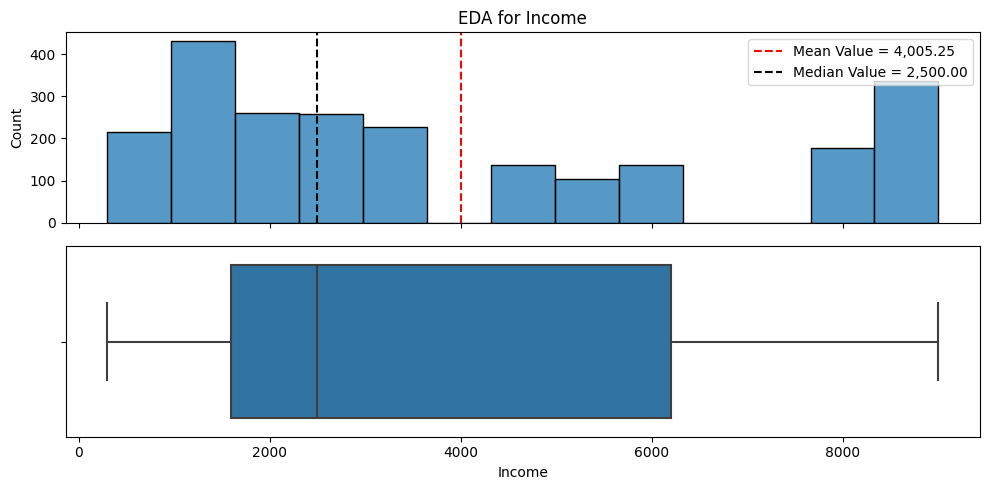

In [682]:
plot_numeric(df,"Income")

The distribution is skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [683]:
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Income'].isna().sum()

0

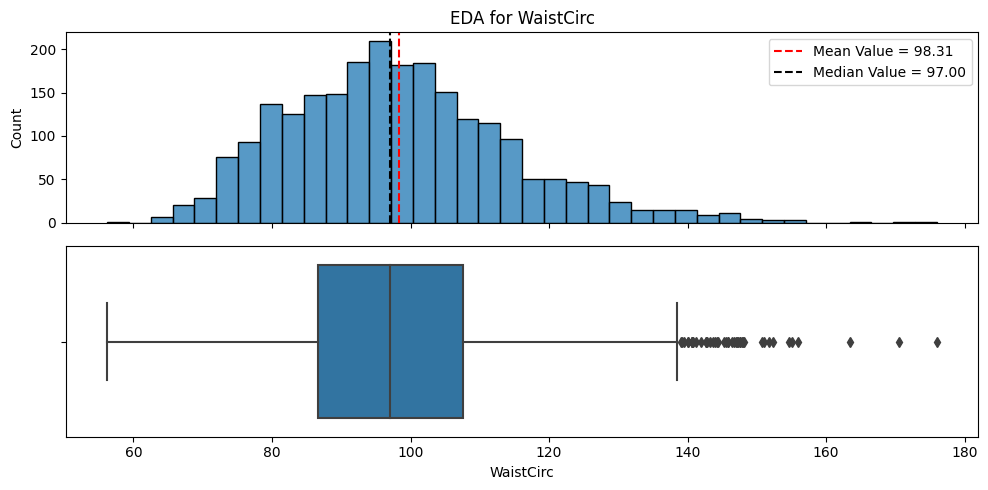

In [684]:
plot_numeric(df,"WaistCirc")

The distrubution is almost normal, we will impute the missing value with the mean in this case.

In [685]:
df['WaistCirc'].fillna(df['WaistCirc'].mean(), inplace = True)
df['WaistCirc'].isna().sum()

0

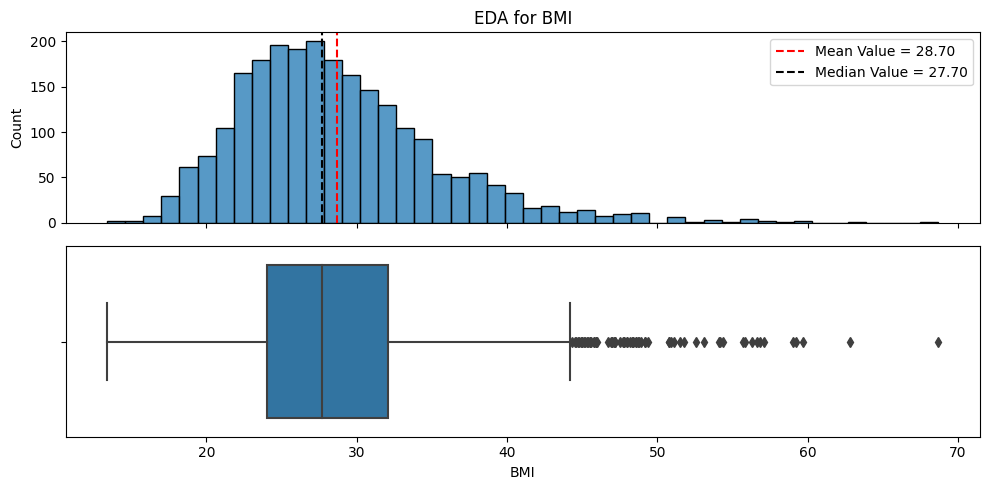

In [686]:
plot_numeric(df,"BMI")

The distribution is slightly skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [687]:
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['BMI'].isna().sum()

0

In [688]:
df['Marital'].value_counts()

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

the most frequent category is Married. we will impute NaN value with it.

In [689]:
df['Marital'].fillna('Married', inplace = True)
df['Marital'].isna().sum()

0

In [690]:
df['Marital'].value_counts()

Married      1400
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

6. Check Target Balance:

In [691]:
df['MetabolicSyndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

dataset fairly balanced.

# Exploratory Visuals:

Produced univariate visuals for the target and all features

1. Categorical columns:

In [692]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64


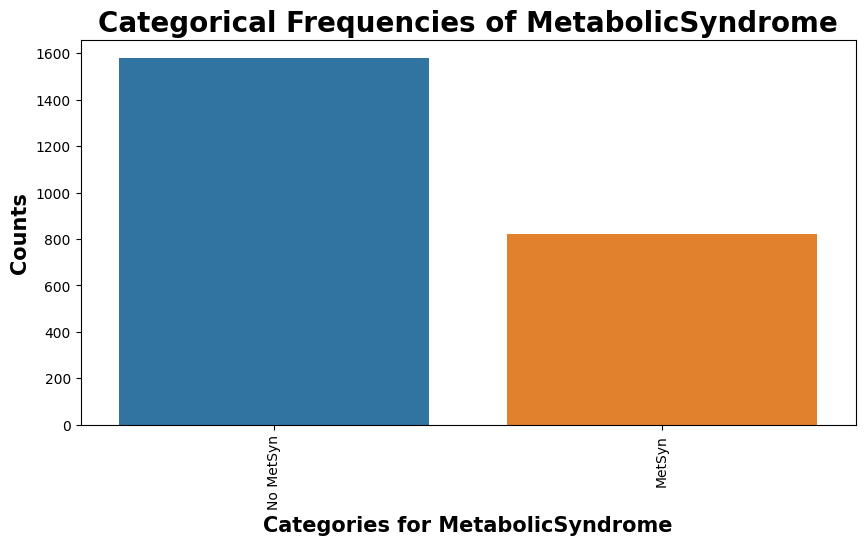

In [693]:
fig, ax = plot_bar(df, 'MetabolicSyndrome', 'MetabolicSyndrome');
print(df['MetabolicSyndrome'].value_counts())

Female    1211
Male      1190
Name: Sex, dtype: int64


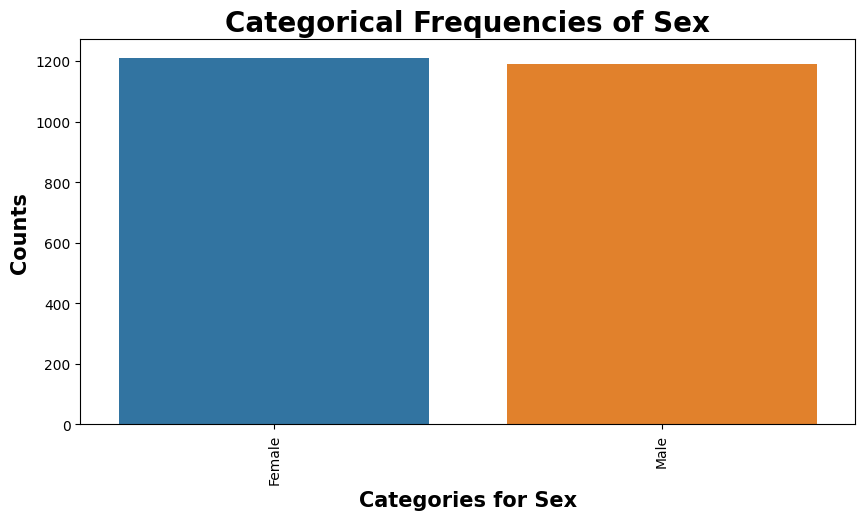

In [694]:
fig, ax = plot_bar(df, 'Sex', 'Sex');
print(df['Sex'].value_counts())

Married      1400
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64


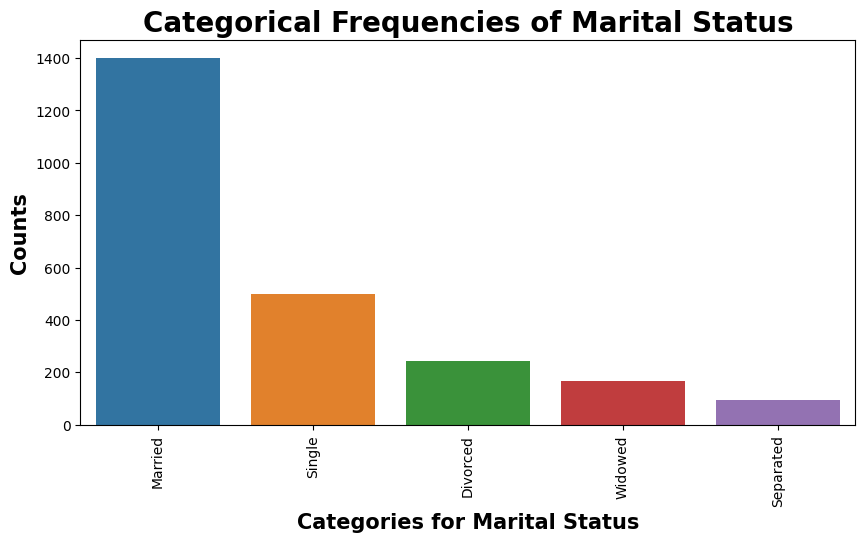

In [695]:
fig, ax = plot_bar(df, 'Marital', 'Marital Status');
print(df['Marital'].value_counts())

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64


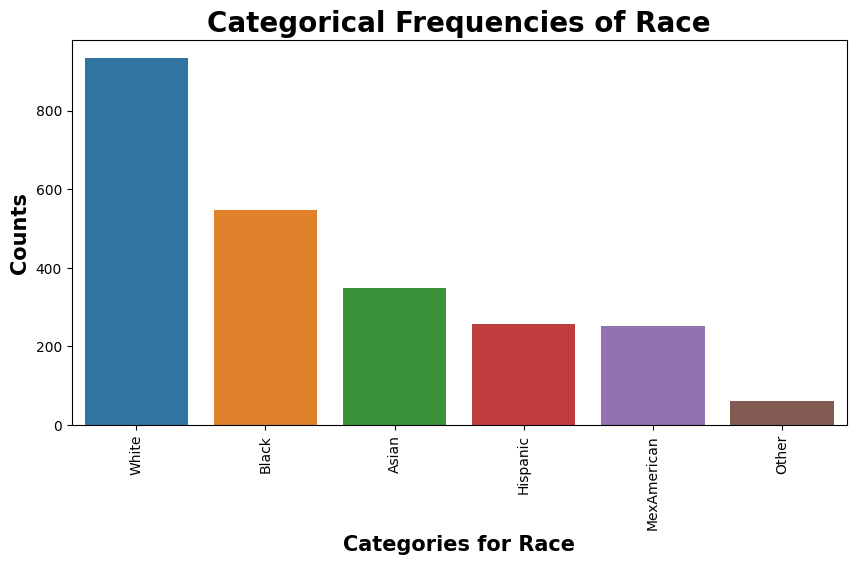

In [696]:
fig, ax = plot_bar(df, 'Race', 'Race');
print(df['Race'].value_counts())

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64


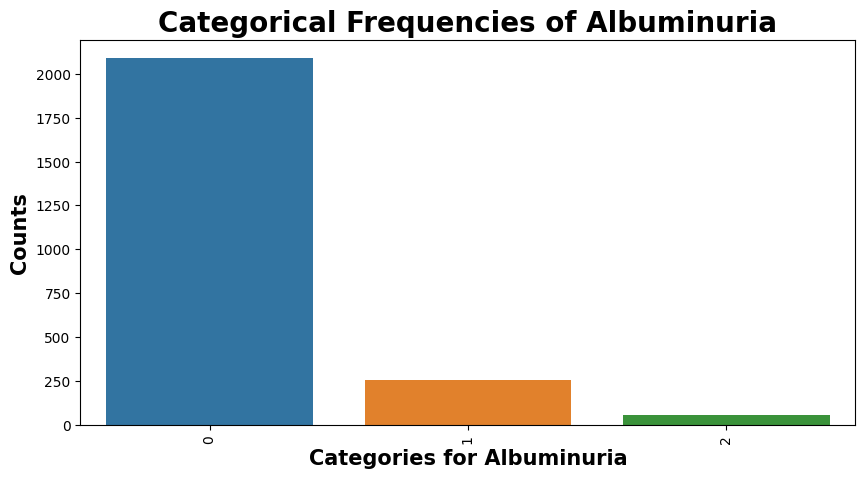

In [697]:
fig, ax = plot_bar(df, 'Albuminuria', 'Albuminuria');
print(df['Albuminuria'].value_counts())

2. Numerical Columns:

In [698]:
df.select_dtypes('number').columns

Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')

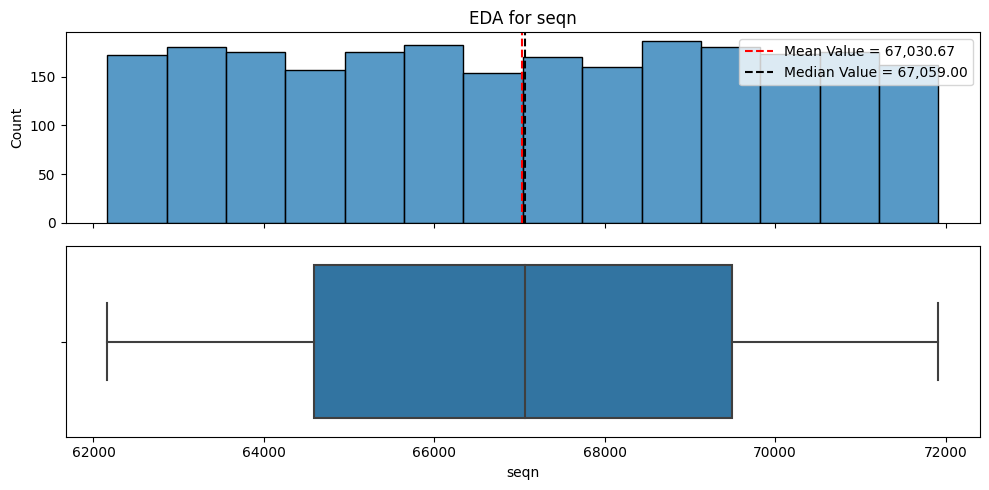

In [699]:
plot_numeric(df,"seqn")

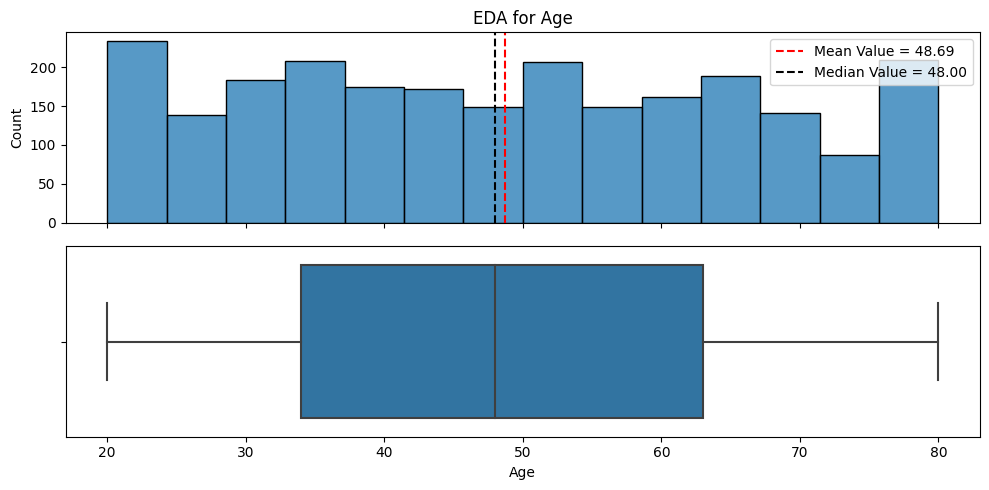

In [700]:
plot_numeric(df,"Age")

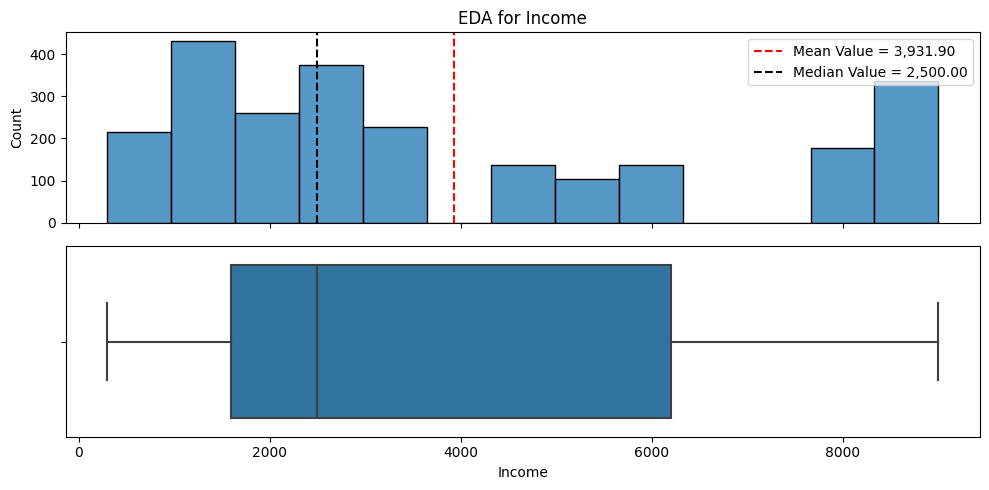

In [701]:
plot_numeric(df,"Income")

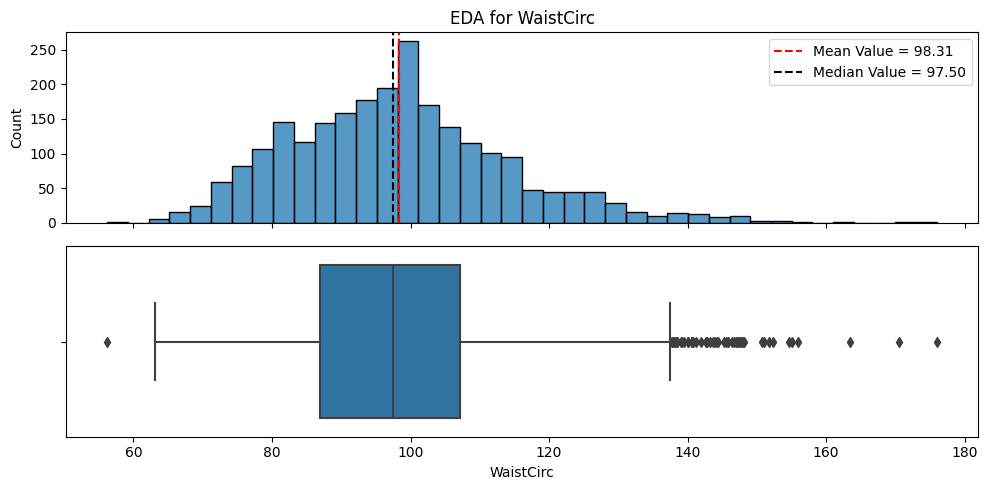

In [702]:
plot_numeric(df,"WaistCirc")

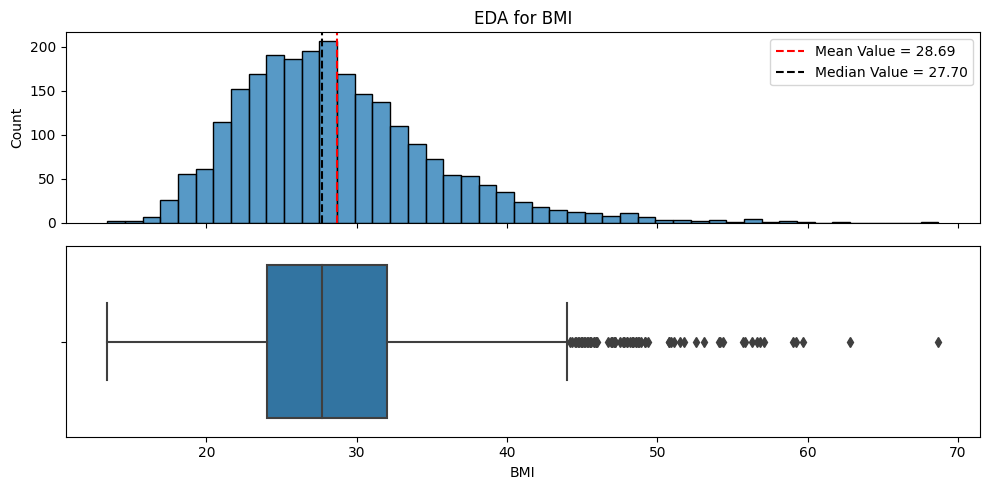

In [703]:
plot_numeric(df,"BMI")

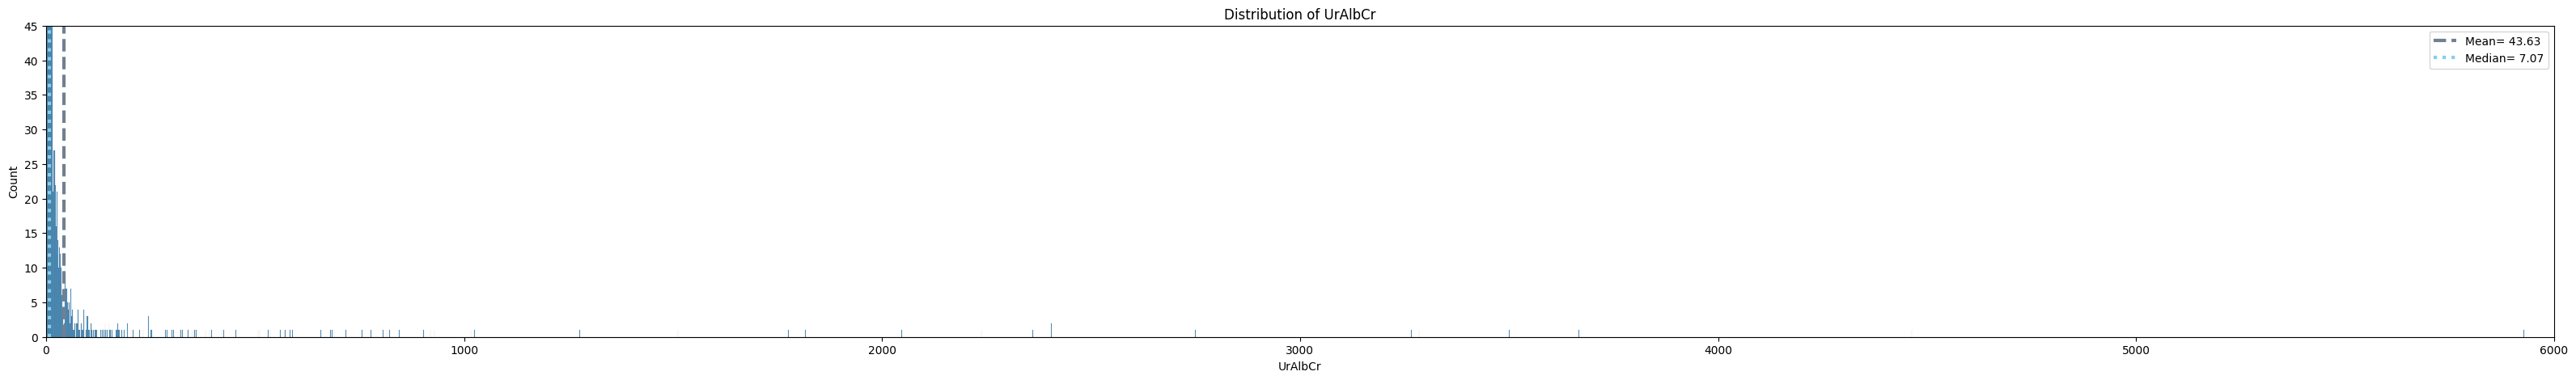

In [704]:
fig, ax = plt.subplots(figsize=(40,5))

## Plot histogram
sns.histplot(data=df,x='UrAlbCr',ax=ax)
ax.set_title("Distribution of UrAlbCr");
ax.set_ylabel('Count')
ax.set_xlabel('UrAlbCr')
ax.set_xlim(left=0,right=6000)
ax.set_ylim(bottom=0,top=45)

  ## Annotating mean and median
mean_value = df['UrAlbCr'].mean()
ax.axvline(mean_value,color='slategray', ls='--', lw=3, label=f"Mean= {mean_value:,.2f}");

med_value = df['UrAlbCr'].median()
ax.axvline(med_value,color='skyblue', ls=':', lw=3, label=f"Median= {med_value:,.2f}");

ax.legend();

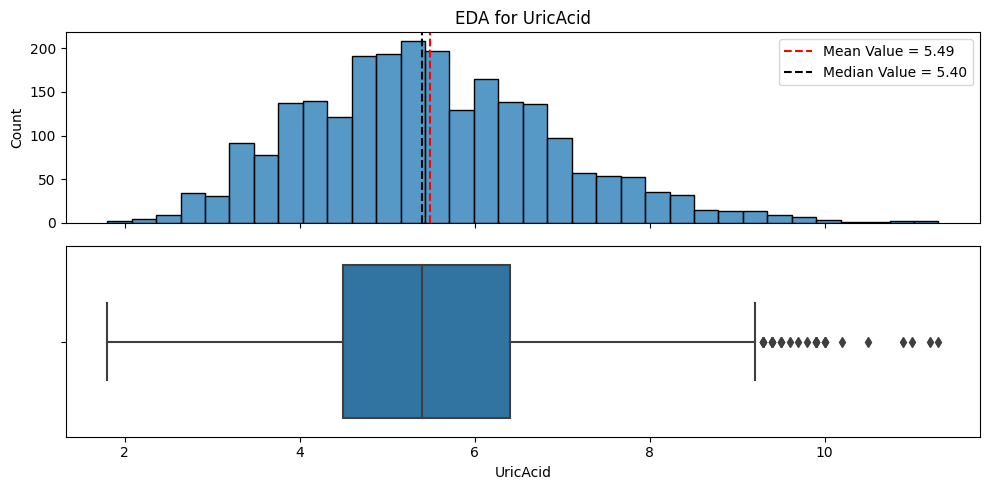

In [705]:
plot_numeric(df,"UricAcid")

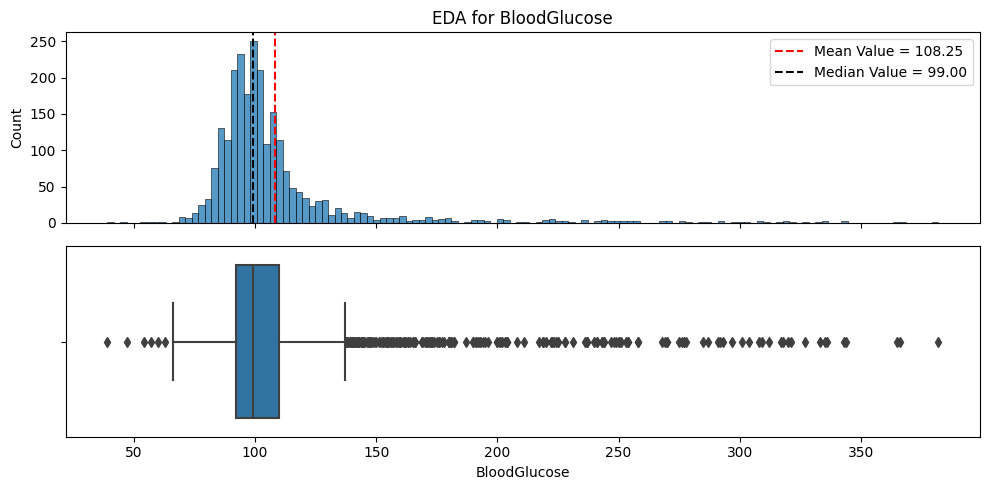

In [706]:
plot_numeric(df,"BloodGlucose")

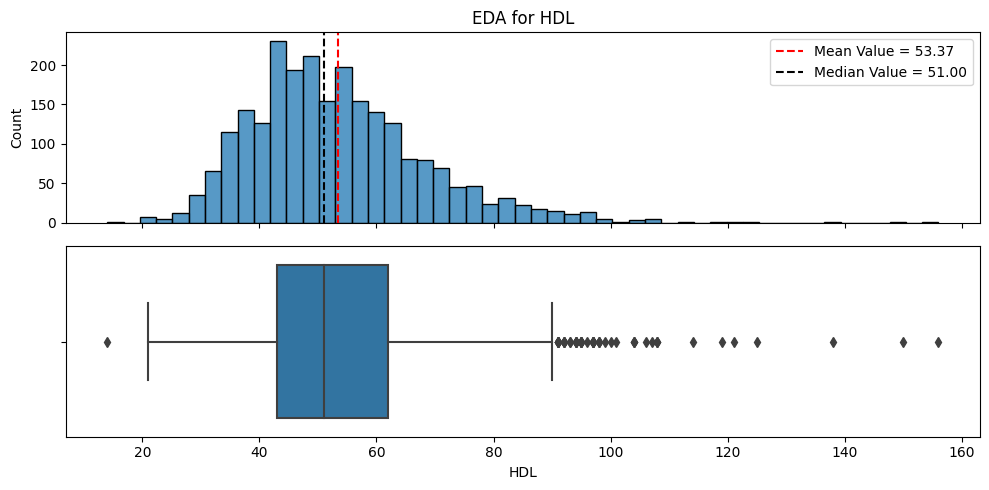

In [707]:
plot_numeric(df,"HDL")

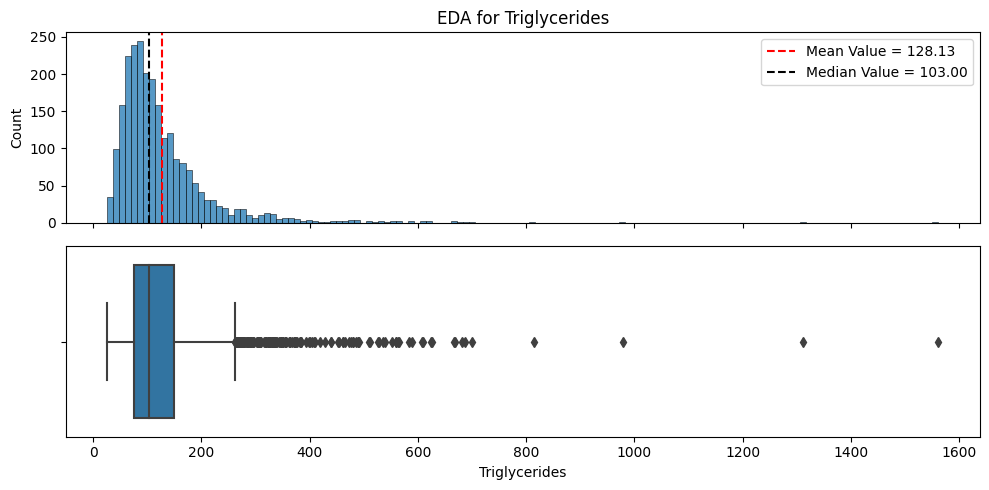

In [708]:
plot_numeric(df,"Triglycerides")

1. For this part of the project, you will continue your data exploration by:
  - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
  - Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.
  
2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).


These plots should be so simple and so easy to read that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy; they need to CLEARLY show an interesting trend or correlation between features in your data.

# Correlation:

(11.5, -0.5)

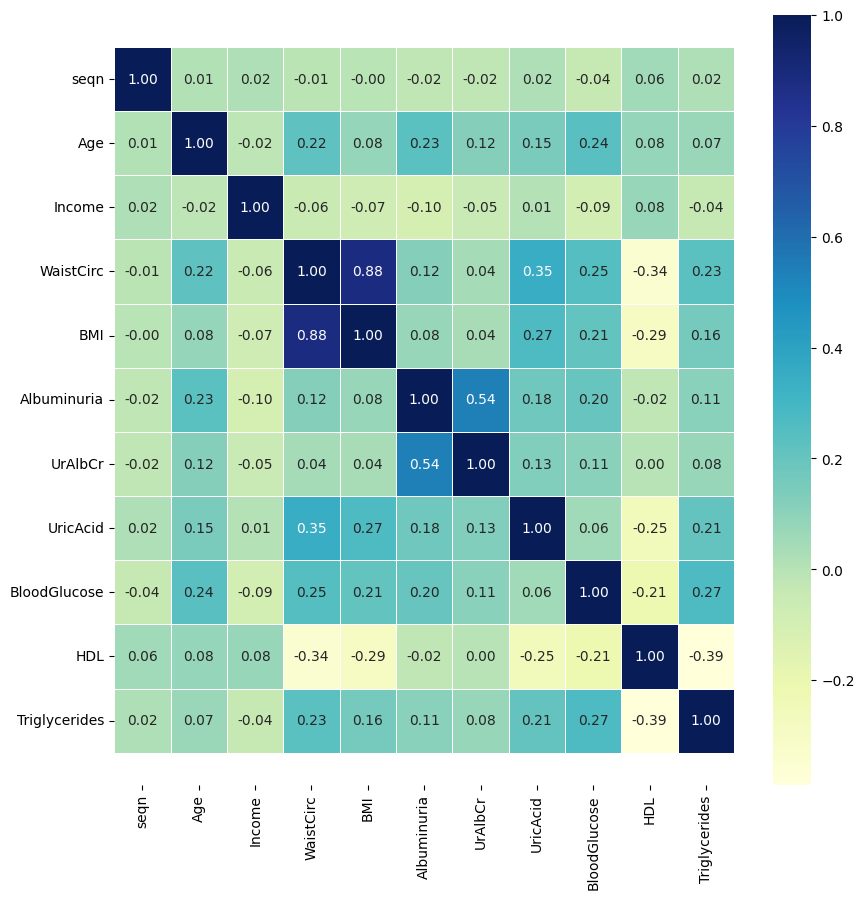

In [709]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- Some features such as BMI and WaistCirc show strong positive correlation between them (0.88).
- We observe positive week coorelation between age and bloodglucose, uric acid, UrAlbCr and Albuminuria.
- a positive moderate coorelation between Albuminuria and UrAlbCr (0.54).
- a negartive week coorelation between HDL and WaistCirc, BMI, UricAcid, BloodGlucose and Triglycerides.


We will take a closer look to the correlation of features with the target:

In [710]:
# Encode 'Drug' column
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({'No MetSyn': 0, 'MetSyn': 1})

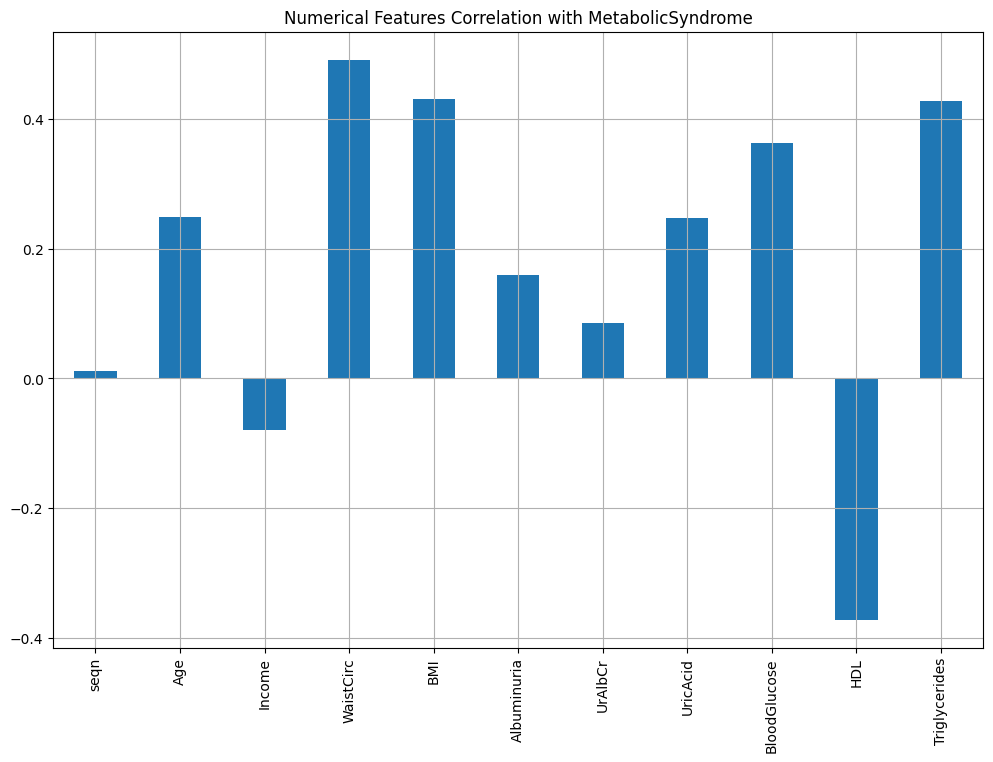

In [711]:
df.drop('MetabolicSyndrome', axis=1).corrwith(df['MetabolicSyndrome']).plot(kind='bar', grid=True, figsize=(12, 8),title="Numerical Features Correlation with MetabolicSyndrome");

Metabolic syndrome shows a positive moderate correlation with WaistCirc, BMI and triglycerides. However, it shows a positive weak correlation with age, albuminuria, UrAlbCr and BloodGlucose.

From the other, we can observe there is a negative weak correlation between HDL and Metabolic syndrom and a very weak negative coorelation between income and Metabolic syndrom.  

# Analyses of features:

1. metabolic syndrom according to Marital Status:

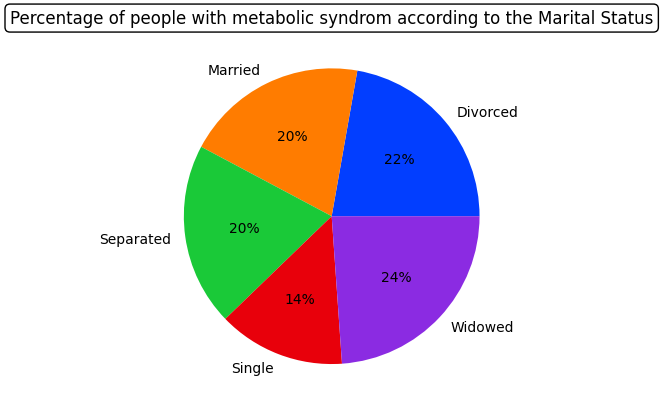

In [712]:
data=df.groupby('Marital')['MetabolicSyndrome'].mean().round(2)
labels = ['Divorced', 'Married', 'Separated', 'Single', 'Widowed']
colors = sns.color_palette('bright')[0:5]
plt.pie( data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of people with metabolic syndrom according to the Marital Status", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.3})
plt.show()

2. metabolic syndrom according to Race:

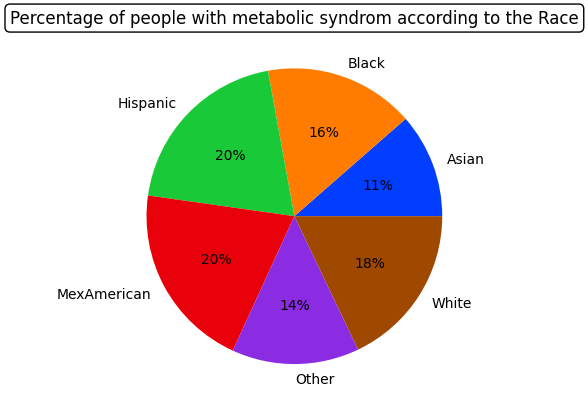

In [713]:
data=df.groupby('Race')['MetabolicSyndrome'].mean().round(2)
labels = ['Asian', 'Black', 'Hispanic', 'MexAmerican', 'Other', 'White']
colors = sns.color_palette('bright')[0:8]
plt.pie( data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of people with metabolic syndrom according to the Race", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.3})
plt.show()

3. Age and metsyn:

In [714]:
# Encode 'Drug' column
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({0 : 'No MetSyn', 1: 'MetSyn'})

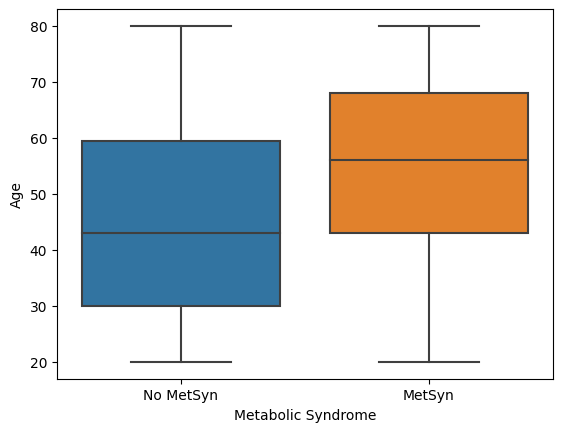

In [715]:
sns.boxplot(data=df, y='Age', x="MetabolicSyndrome");
plt.ylabel('Age')
plt.xlabel('Metabolic Syndrome');

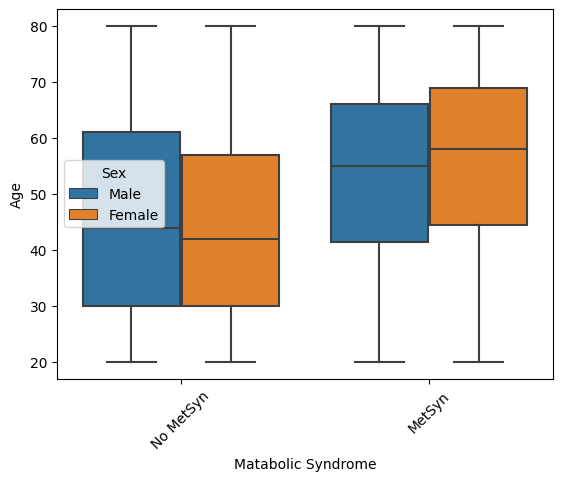

In [716]:
sns.boxplot(data=df, x='MetabolicSyndrome', y="Age", hue='Sex');
plt.ylabel('Age')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

4. Income and Metsyn:

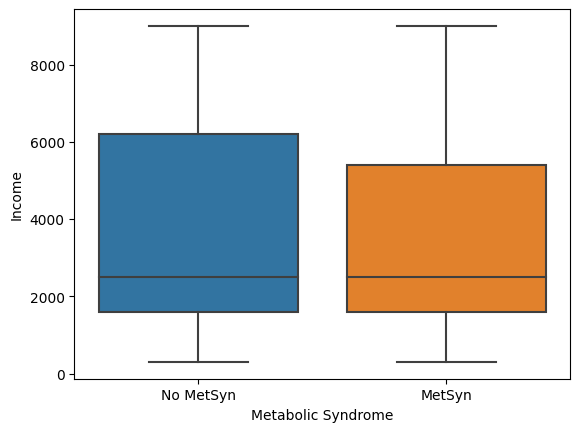

In [717]:
sns.boxplot(data=df, y='Income', x="MetabolicSyndrome");
plt.ylabel('Income')
plt.xlabel('Metabolic Syndrome');

5. Analyses of features with moderate coorelation with metabolicSyndrome:

5.1. BMI:

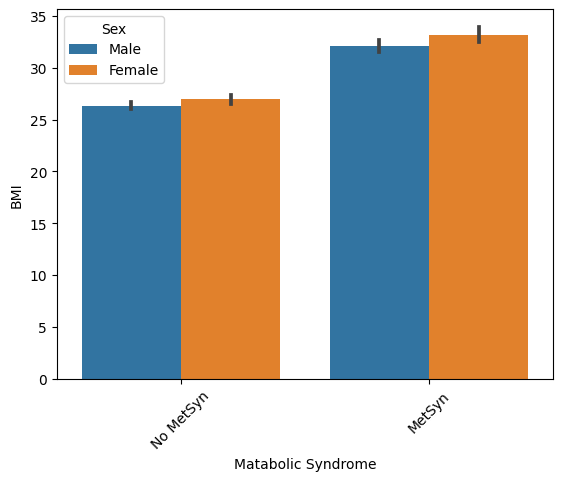

In [718]:
sns.barplot(data=df, x='MetabolicSyndrome', y="BMI", hue='Sex');
plt.ylabel('BMI')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

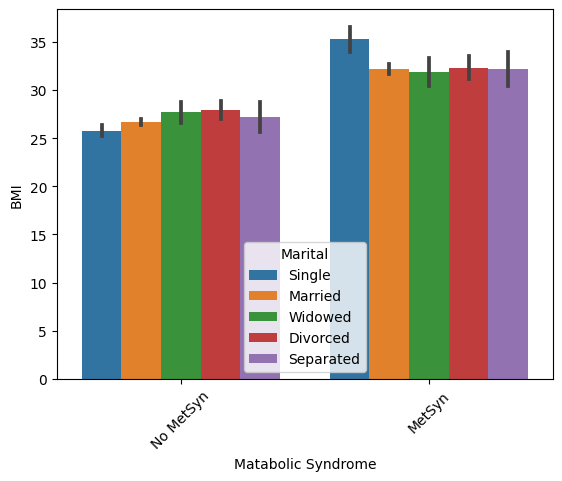

In [719]:
sns.barplot(data=df, x='MetabolicSyndrome', y="BMI", hue='Marital');
plt.ylabel('BMI')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

5.2. WaistCirc:

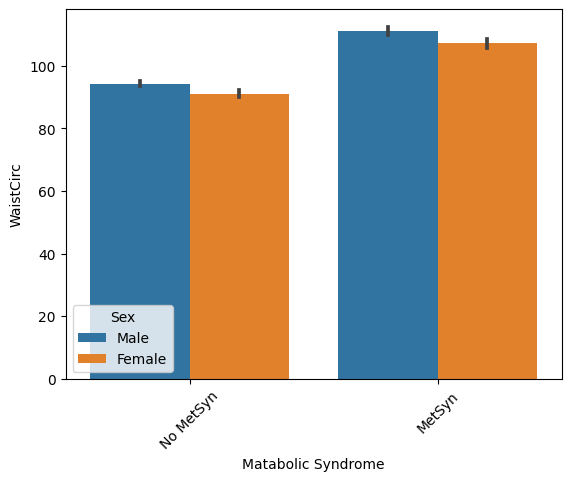

In [720]:
sns.barplot(data=df, x='MetabolicSyndrome', y="WaistCirc", hue='Sex');
plt.ylabel('WaistCirc')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

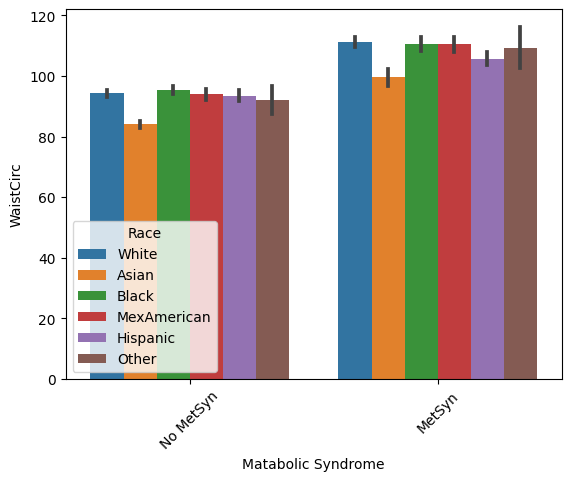

In [721]:
sns.barplot(data=df, x='MetabolicSyndrome', y="WaistCirc", hue='Race');
plt.ylabel('WaistCirc')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

5.3. Triglycerides:

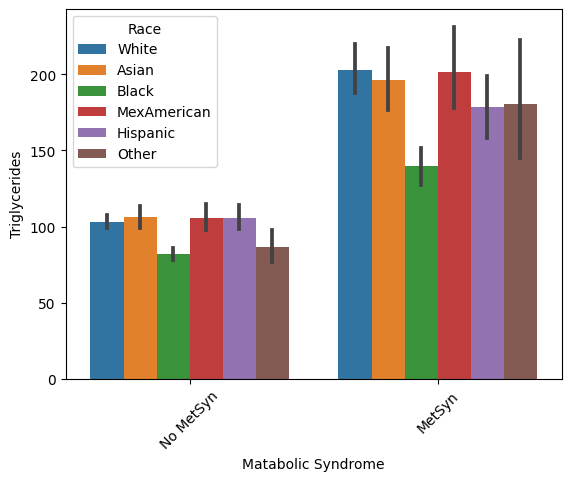

In [722]:
sns.barplot(data=df, x='MetabolicSyndrome', y="Triglycerides", hue='Race');
plt.ylabel('Triglycerides')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

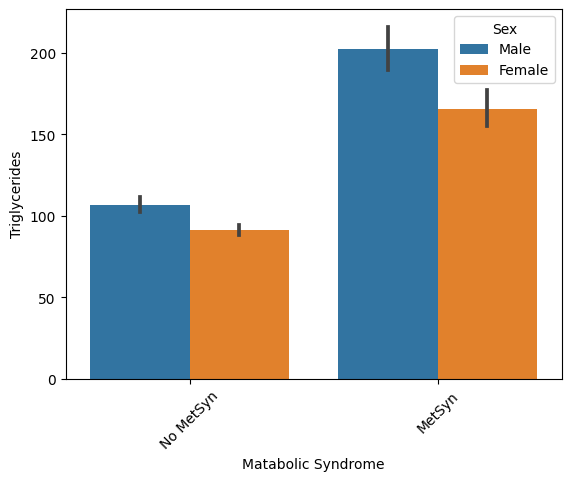

In [723]:
sns.barplot(data=df, x='MetabolicSyndrome', y="Triglycerides", hue='Sex');
plt.ylabel('Triglycerides')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

5.4. Blood Glucose:

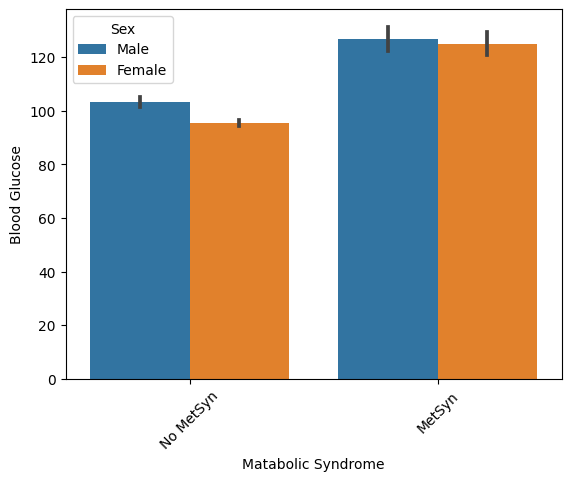

In [724]:
sns.barplot(data=df, x='MetabolicSyndrome', y="BloodGlucose", hue='Sex');
plt.ylabel('Blood Glucose')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

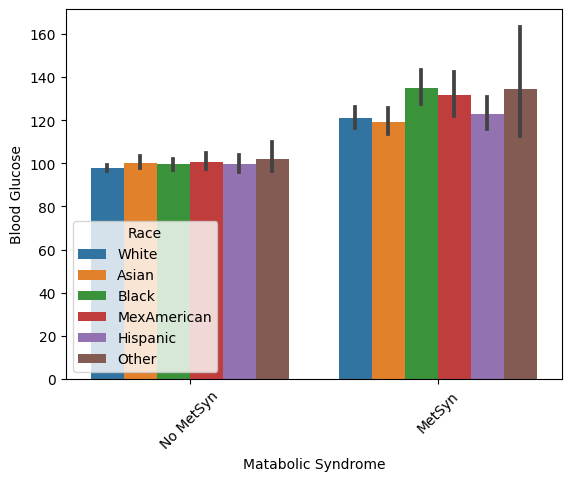

In [725]:
sns.barplot(data=df, x='MetabolicSyndrome', y="BloodGlucose", hue='Race');
plt.ylabel('Blood Glucose')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

5.5. HDL:

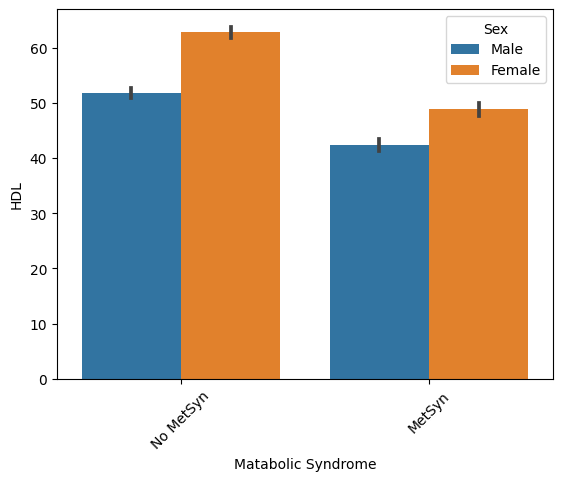

In [726]:
sns.barplot(data=df, x='MetabolicSyndrome', y="HDL", hue='Sex');
plt.ylabel('HDL')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

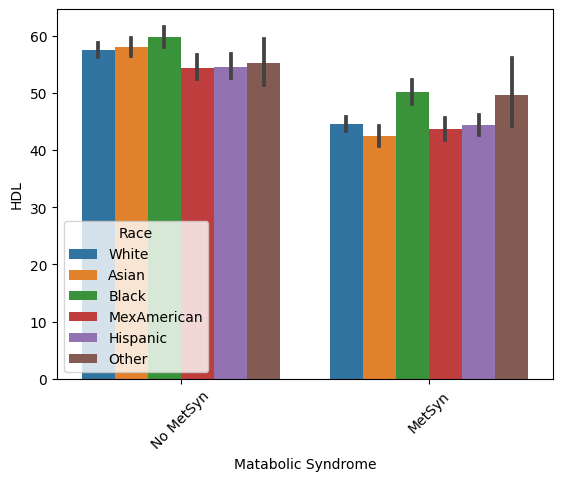

In [727]:
sns.barplot(data=df, x='MetabolicSyndrome', y="HDL", hue='Race');
plt.ylabel('HDL')
plt.xlabel('Matabolic Syndrome')
plt.xticks(rotation = 45);

Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

In [728]:
# Encode 'Drug' column
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({'No MetSyn': 0, 'MetSyn': 1})

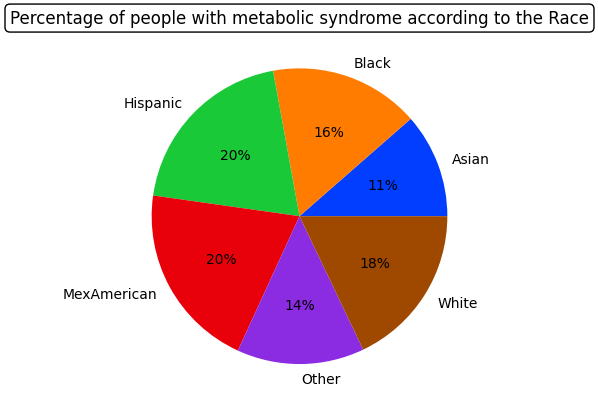

In [729]:
data=df.groupby('Race')['MetabolicSyndrome'].mean().round(2)
labels = ['Asian', 'Black', 'Hispanic', 'MexAmerican', 'Other', 'White']
colors = sns.color_palette('bright')[0:8]
plt.pie( data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of people with metabolic syndrome according to the Race", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.3})
plt.show()

Who is most affected by metabolic syndrome?

Hispanic and Mexican Americans are more likely to get metabolic syndrome (20%), followed by white poeple (18%) and Black poeple(16%). The least to get metabolic syndrome are Asian with only 11% of affected people.

Diabetes: high triglyceride and low HDL:

In [730]:
# Encode 'Drug' column
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({0 : 'No MetSyn', 1: 'MetSyn'})

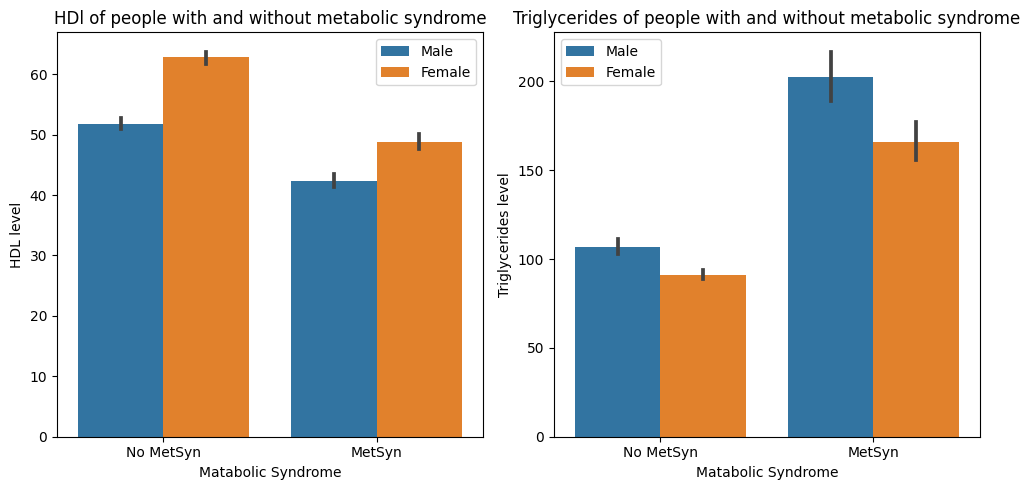

In [731]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharex=True)

sns.barplot(data=df, x='MetabolicSyndrome', y="HDL", hue='Sex', ax = axes[0] );
axes[0].set_ylabel('HDL level')
axes[0].set_xlabel('Matabolic Syndrome')
axes[0].legend();

sns.barplot(data=df, x='MetabolicSyndrome', y="Triglycerides", hue='Sex', ax = axes[1] );
axes[1].set_ylabel('Triglycerides level')
axes[1].set_xlabel('Matabolic Syndrome')
axes[1].legend();



  ## Updating title of top graph
axes[0].set_title(f'HDl of people with and without metabolic syndrome')
axes[1].set_title(f'Triglycerides of people with and without metabolic syndrome')

  ## Fixing any overlapping labels and showing
plt.tight_layout()
plt.show()

Triglycerides are a type of fat in your blood that your body uses for energy and
HDL is hight density lipoproteins cholesterol, sometimes called “good” cholesterol. It absorbs cholesterol in the blood and carries it back to the liver.

The combination of high levels of triglycerides with low HDL can increase riks for health problems, such as heart attack, and diabetes.

From the graph, we can observe that for healthy people triglycerides is around 80 and 100, with a lower level for womans. This level incresed significantly for poeple who got metabolic syndrome, specially for men, to reach a level over 200.

In case of HDL cholesterol, we observe the opposite phenoma, there is a decrease of HDL level of poeple with metabolic syndrome for both man and women.

# Pre_processing:

In [732]:
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({'No MetSyn':0, 'MetSyn':1})

In [733]:
df['MetabolicSyndrome'].value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

In [734]:
X = df.drop(columns = ['MetabolicSyndrome'])
y = df['MetabolicSyndrome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Numerical features:

In [735]:
#Create list of column names for numeric columns
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', StandardScaler(), num_cols)
num_tuple

Numeric Columns: Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')


('numeric',
 StandardScaler(),
 Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
        'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
       dtype='object'))

2. Nominal features:

In [736]:
nomi_cols = ['Sex', 'Marital', 'Race']
# Instantiate the individual preprocessors
nomi_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Making a ohe_tuple for ColumnTransformer
nomi_tuple = ('nomi categorical', nomi_encoder, nomi_cols)
nomi_tuple

('nomi categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 ['Sex', 'Marital', 'Race'])

In [737]:
#Instantiate the ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, nomi_tuple],verbose_feature_names_out=False)

In [738]:
#Fit the Transformer on Training Data Only
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')),
                                ('nomi categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'Marital', 'Race'])],
                  verbose_feature_names_out=False)

In [739]:
# Transform  data
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
263,-1.358170,-0.176875,1.443579,1.588786,1.815754,-0.366397,-0.100646,-1.503810,0.962189,-0.045041,0.728110,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2073,1.239695,-0.857407,-0.165173,-0.770042,-0.637064,-0.366397,-0.108892,0.406271,0.185052,1.929154,-0.704544,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
632,-0.823160,-0.914117,-0.165173,-1.468954,-0.561824,-0.366397,-0.125171,-1.435593,-0.323077,-0.637299,-0.704544,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1732,0.775500,-0.006742,1.717409,-0.177215,0.687157,-0.366397,-0.152526,-1.913113,-0.562196,-0.176654,0.115599,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
765,-0.623460,-1.084250,1.717409,-1.425272,-1.028311,-0.366397,-0.138548,1.088443,-0.801315,0.283992,2.762893,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Modeling:

1. Fit and evaluate multiple types of models:

In [740]:
import warnings
warnings.filterwarnings('ignore')

In [741]:
def evaluate_model (model):
  model_pipe = make_pipeline(model)
  model_pipe.fit(X_train_processed,y_train)
  train_preds = model_pipe.predict(X_train_processed)
  test_preds = model_pipe.predict(X_test_processed)

  train_score = accuracy_score(y_train, train_preds)
  test_score = accuracy_score(y_test, test_preds)
  print (f'The training accuracy is {train_score:.3f}.')
  print (f'The testing accuracy is {test_score:.3f}.')

  train_rec = recall_score (y_train, train_preds)
  test_rec = recall_score (y_test, test_preds)
  print (f'The training recall of is {train_rec:.3f}.')
  print (f'The testing recall of is {test_rec:.3f}.')

  train_prec = precision_score (y_train, train_preds)
  test_prec = precision_score (y_test, test_preds)
  print (f'The training precision of is {train_prec:.3f}.')
  print (f'The testing precision of is {test_prec:.3f}.')

  ConfusionMatrixDisplay.from_estimator(model, X_test_processed, y_test, cmap = 'Blues');
  print(classification_report(y_test, test_preds));

1.1. LogisticRegression:

The training accuracy is 0.854.
The testing accuracy is 0.819.
The training recall of is 0.731.
The testing recall of is 0.632.
The training precision of is 0.825.
The testing precision of is 0.791.
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       397
           1       0.79      0.63      0.70       204

    accuracy                           0.82       601
   macro avg       0.81      0.77      0.79       601
weighted avg       0.82      0.82      0.81       601



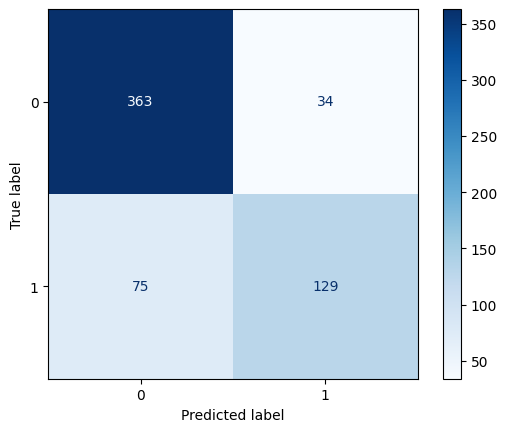

In [742]:
logreg = LogisticRegression()
evaluate_model(logreg)

Tuning:

In [743]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1', 'l2'], 'solver': ['liblinear','saga']},

In [744]:
dt_grid_search = GridSearchCV(logreg, param_grid)

In [745]:
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=({'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},))

In [746]:
dt_grid_search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

evaluation after tuning:

In [747]:
best_model = dt_grid_search.best_estimator_

The training accuracy is 0.854.
The testing accuracy is 0.819.
The training recall of is 0.731.
The testing recall of is 0.642.
The training precision of is 0.823.
The testing precision of is 0.784.
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       397
           1       0.78      0.64      0.71       204

    accuracy                           0.82       601
   macro avg       0.81      0.78      0.79       601
weighted avg       0.82      0.82      0.81       601



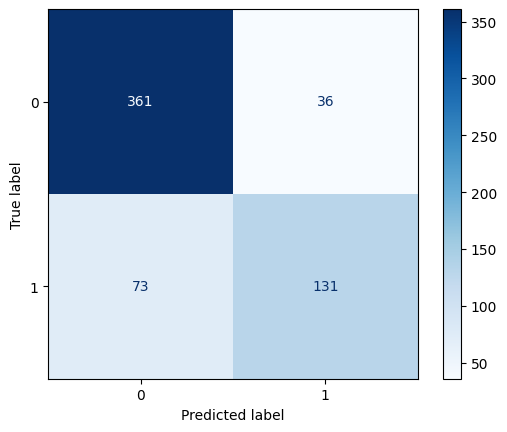

In [748]:
evaluate_model(best_model)

1.2.  k-nearest neighbors:

The training accuracy is 0.864.
The testing accuracy is 0.780.
The training recall of is 0.736.
The testing recall of is 0.588.
The training precision of is 0.847.
The testing precision of is 0.714.
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       397
           1       0.71      0.59      0.65       204

    accuracy                           0.78       601
   macro avg       0.76      0.73      0.74       601
weighted avg       0.77      0.78      0.77       601



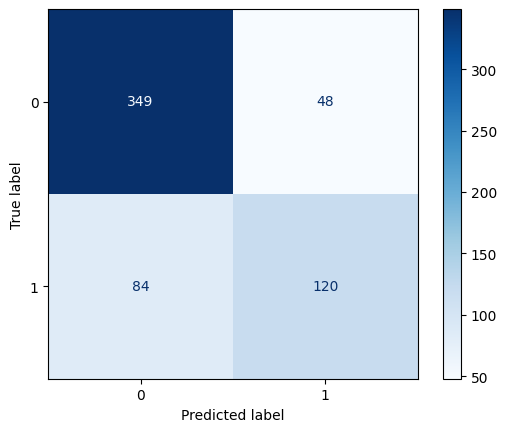

In [749]:
knn = KNeighborsClassifier()
evaluate_model(knn)

Tuning:

In [750]:
param_grid = {'n_neighbors': [3,5,6,7], 'weights':['uniform', 'distance'], 'leaf_size': [5,10,15,20,25,30]},

In [751]:
dt_grid_search = GridSearchCV(knn, param_grid)

In [752]:
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=({'leaf_size': [5, 10, 15, 20, 25, 30],
                          'n_neighbors': [3, 5, 6, 7],
                          'weights': ['uniform', 'distance']},))

In [753]:
dt_grid_search.best_params_

{'leaf_size': 5, 'n_neighbors': 7, 'weights': 'distance'}

Evaluation after tuning:

In [754]:
best_model_k = dt_grid_search.best_estimator_

The training accuracy is 1.000.
The testing accuracy is 0.789.
The training recall of is 1.000.
The testing recall of is 0.613.
The training precision of is 1.000.
The testing precision of is 0.723.
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       397
           1       0.72      0.61      0.66       204

    accuracy                           0.79       601
   macro avg       0.77      0.75      0.75       601
weighted avg       0.78      0.79      0.78       601



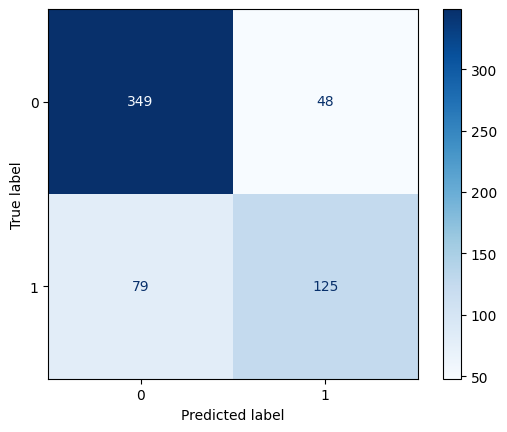

In [755]:
evaluate_model(best_model_k)

1.3. Random Forest:

The training accuracy is 1.000.
The testing accuracy is 0.880.
The training recall of is 1.000.
The testing recall of is 0.770.
The training precision of is 1.000.
The testing precision of is 0.863.
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       397
           1       0.86      0.77      0.81       204

    accuracy                           0.88       601
   macro avg       0.88      0.85      0.86       601
weighted avg       0.88      0.88      0.88       601



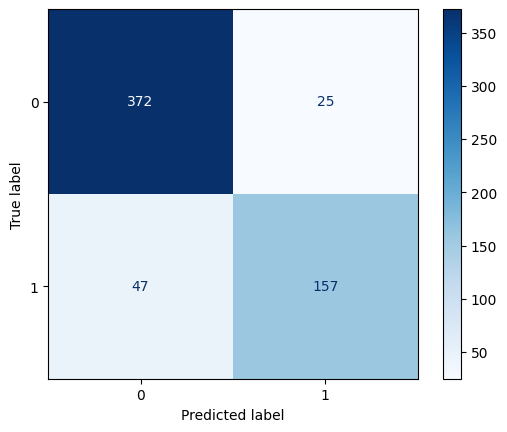

In [756]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
evaluate_model(rf)

Tuning:

In [757]:
param_grid_rf = param_grid = {'max_depth': [1,2,3,4,5,6,7,8],'min_samples_leaf': [1,15,20],'min_samples_split': [2, 10, 100], 'n_estimators': [5,10,50,100]};

In [758]:
dt_grid_search = GridSearchCV(rf, param_grid_rf)

In [759]:
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 15, 20],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [5, 10, 50, 100]})

Evaluate after tuning:

In [760]:
dt_grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

The training accuracy is 0.946.
The testing accuracy is 0.875.
The training recall of is 0.905.
The testing recall of is 0.755.
The training precision of is 0.935.
The testing precision of is 0.860.
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       397
           1       0.86      0.75      0.80       204

    accuracy                           0.88       601
   macro avg       0.87      0.85      0.86       601
weighted avg       0.87      0.88      0.87       601



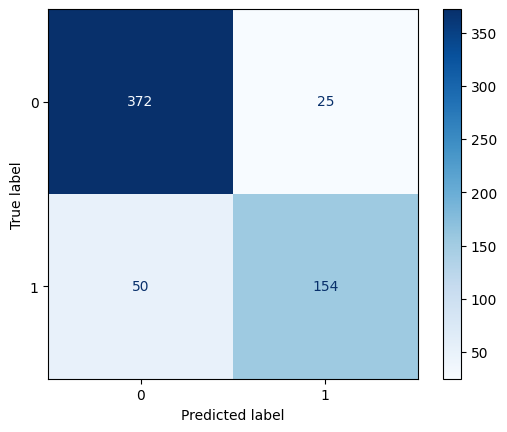

In [761]:
best_model_rf = dt_grid_search.best_estimator_
evaluate_model(best_model_rf)

* What do 'false positives' and 'false negatives' mean for this problem? Which is worse?

    - 'false positives'= Patient is healthy is predicted to have MetSyn .
    - 'false negatives'= Patient have MetSyn but is predicted to be healthy.

* Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?

Tuned Random Forest Model is the recommended model for fire detection:
it is accurancy (0.875) is better than the one of Tuned Logistic Regression (0.819) and Tnued k-nearest neighbors (0.789).

metrics recall and precision are important in this case. A higher recall means fewer false negative predictions, also known as type 2 errors, which mean a lower risk that the patient without MetSyn is predicted to be sick and a high precision means fewer type 1 errors, or fewer false positives, which mean a lower risk to predict that the patient is healthy while he has MetSyn.

In the Tuned Random Forest Model, testing recall is 0.76 and testing precision is 0.86, which is a better result than the one obtained from the other model(Vs recall=0.61 and precision=0.72 for Tuned K-nearest neighbors and recall=0.64 and precision=0.78 for tuned logistic regression).

Also the Confusion Matrix shows that:
False negative in Random Forest Model is equal to 50 while in the other model, it is equal to 79 and 73 which is better but important because it is dangerous to actualy have a patient with MetSyn but predicted to be healthy.
in Random Forest Model is equal to 25 while in the other model, it is equal to 48 and 36.


# PCA:

In [775]:
from sklearn.decomposition import PCA

In [776]:
pca = PCA(n_components=.84)

In [777]:
X_train_pca = pca.fit_transform(X_train_processed)

X_test_pca = pca.transform(X_test_processed)

In [778]:
X_train_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
263,1.316323,-1.139883,-1.121209,0.427681,-0.368852,1.945235,2.320369,0.758399,0.241065,0.207076
2073,-1.521055,0.319308,-0.290725,-0.504719,0.042809,-1.310098,-0.353193,-1.115977,1.322017,0.155061
632,-1.908803,-0.127279,0.657186,1.158494,0.354589,0.645520,0.739671,0.004240,-0.917986,0.036717
1732,-0.826157,-0.656810,-0.652991,-0.714686,-0.565330,0.023641,2.155410,0.767315,-1.011496,-0.027222
765,-0.731665,-0.299729,2.813816,-1.926507,0.142029,0.780806,0.172274,1.438454,1.710661,-0.152301
...,...,...,...,...,...,...,...,...,...,...
1638,1.434690,-1.751653,0.819639,-0.634463,1.460109,-0.838490,0.399263,-0.538605,0.400811,-0.071831
1095,-0.863447,-0.549966,0.391799,-1.505087,0.494105,0.814064,0.466762,-0.376949,-0.344519,0.022764
1130,0.055615,0.957681,-0.600129,0.928608,-2.757280,0.961519,0.374512,-1.300716,-0.187782,0.602025
1294,1.739211,1.296054,-0.161451,-0.265305,0.492525,-0.398473,-0.889782,-0.156323,-0.085829,-0.996866


In [788]:
rf = RandomForestClassifier()
# Create a modeling pipeline
rf_pipe = make_pipeline(rf)
rf_pipe.fit(X_train_pca, y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [789]:
print('Training accuracy:', rf_pipe.score(X_train_pca, y_train))
print('Testing accuracy:', rf_pipe.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8136439267886856


In [790]:
param_grid_rf = param_grid = {'max_depth': [1,2,3,4,5,6,7,8],'min_samples_leaf': [1,15,20],'min_samples_split': [2, 10, 100], 'n_estimators': [5,10,50,100]};
dt_grid_search_rf = GridSearchCV(rf, param_grid_rf)
dt_grid_search_rf.fit(X_train_pca, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 15, 20],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [5, 10, 50, 100]})

In [791]:
dt_grid_search_rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 10}

In [792]:
best_model_rf1 = dt_grid_search_rf.best_estimator_

In [793]:
rf1_pipe = make_pipeline(best_model_rf1)
rf1_pipe.fit(X_train_pca, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=15,
                                        n_estimators=10))])

In [794]:
print('Training accuracy:', rf1_pipe.score(X_train_pca, y_train))
print('Testing accuracy:', rf1_pipe.score(X_test_pca, y_test))

Training accuracy: 0.8511111111111112
Testing accuracy: 0.8053244592346089


In [795]:
y_pred = rf1_pipe.predict(X_test_pca)

In [796]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       397
           1       0.73      0.69      0.71       204

    accuracy                           0.81       601
   macro avg       0.78      0.78      0.78       601
weighted avg       0.80      0.81      0.80       601



PCA applied to this problem did not give a best metrics results. However, when we compare the results of the training accurancy and testing accurancy, the model with PCA is slightly more balanced.